**Description**: Dirty notebook code which plots posterior distributions (optionally
with trace plots) with labeled axes for a given experiment configuration.

**Estimated runtime**: 5 sec.

In [1]:
import os
from typing import Literal

import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import matplotlib
# matplotlib.rcParams["mathtext.fontset"] = "stix"
# matplotlib.rcParams["font.family"] = "STIXGeneral"

In [3]:
sns.set_theme(style="darkgrid")

In [4]:
model_type: Literal["main", "test"] = "main"
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 500
boost_or_bias: Literal["boost", "bias"] = "bias"

In [5]:
# should be a dict, whatever
if model_type == "main":
    if boost_or_bias == "boost":
        file_suffix = "boost"
        treatment, control = "extra", "base"
        desc = "pretraining boost"
    else:
        file_suffix = "bias"
        treatment, control = "test", "extra"
        desc = "evaluation bias"
elif model_type == "test":
    if boost_or_bias == "boost":
        # TODO: maybe get this out of the InferenceData?
        treatment_effect_prior_mean_std = (0, 0.001)
        file_suffix = "null"
    else:
        treatment_effect_prior_mean_std = (0.1, 0.01)
        file_suffix = "non_null"
else:
    raise ValueError("no")

In [6]:
idata = az.from_netcdf(
    filename=os.path.join(
        "netcdfs",
        f"m{num_train}",
        f"{model_type}_m{num_train}_n{num_test}_{file_suffix}.nc",
    )
)

In [7]:
# if model_type == "main":
#     ax = az.plot_trace(idata, compact=False, var_names="method", filter_vars="like")
#     ax_posterior: plt.Axes = ax[0][0]
#     # csfont = {"fontname": "Times New Roman"}
#     # _ = ax[0][0].set_title(f'$\\beta$ for {utils.diffco_texa(treatment, control)}', **csfont)
#     _ = ax_posterior.set_title(
#         f"$n={num_test}$, {desc} ({utils.diffco_texa(treatment, control)})"
#     )
#     _ = ax_posterior.set_xlabel(f"$\\beta$")
#     _ = ax_posterior.set_ylabel("posterior density")
#     fig = ax_posterior.get_figure()
#     fig.delaxes(ax[0][1])

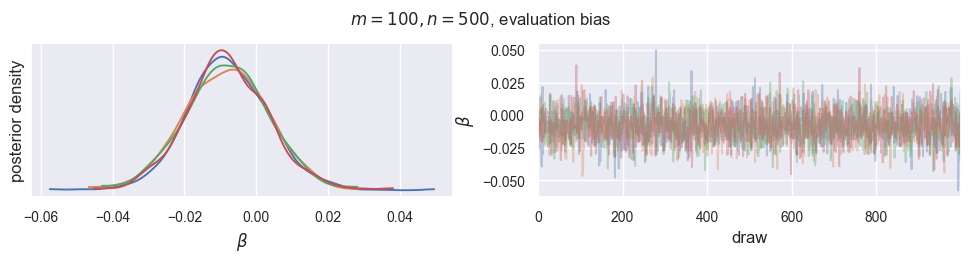

In [8]:
if model_type == "main":
    title = f"$m={num_train}, n={num_test}$, {desc}"
else:
    mean, std = treatment_effect_prior_mean_std
    title = f"$\\beta \\sim \\text{{Normal}}({mean}, {std})$"

ax = az.plot_trace(idata["posterior"]["method"], compact=False) # var_names="method", filter_vars="like")

ax_posterior: plt.Axes = ax[0][0]
ax_trace: plt.Axes = ax[0][1]
# csfont = {"fontname": "Times New Roman"}
# _ = ax[0][0].set_title(f'$\\beta$ for {utils.diffco_texa(treatment, control)}', **csfont)
_ = ax_posterior.get_figure().suptitle(title, fontsize=12, y=1.05)

_ = ax_posterior.set_title("")
_ = ax_posterior.set_xlabel("$\\beta$")
_ = ax_posterior.set_ylabel("posterior density")

_ = ax_trace.set_title("")
_ = ax_trace.set_xlabel("draw")
_ = ax_trace.set_ylabel("$\\beta$")

fig = ax_posterior.get_figure()
# fig.tight_layout()